# Lab 9 & 10 :  Image Classification using ML
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 6/04/2022
#### Dataset Used:- Chest_xrays

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2, os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score

In [3]:
classpaths = ['/content/drive/MyDrive/chest_xray/train/NORMAL','/content/drive/MyDrive/chest_xray/train/PNEUMONIA']
data = []
target = []
d = {'NORMAL':0,'PNEUMONIA':1}

for classpath in classpaths:
  c = classpath.split('/')[-1]
  print("Loading "+c)
  imgnames = os.listdir(classpath)
  for imgname in imgnames:
    imgpath = os.path.join(classpath,imgname)
    img = cv2.imread(imgpath)
    img = cv2.resize(img,(100,100))
    img = np.array(img)
    data.append(img)
    target.append(d[c])
  print(c+" done")

Loading NORMAL
NORMAL done
Loading PNEUMONIA
PNEUMONIA done


In [4]:
print('total images: ',len(data),len(target))

total images:  5216 5216


In [5]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

data2 = [0 for i in range(len(data))]
for i,d in enumerate(data):
  data2[i] = np.ravel(d)
data = np.array(data2)
target = np.array(target)

traindata, testdata, traintarget, testtarget = train_test_split(data,target,test_size=0.2)

print(traindata.shape)
print(traintarget.shape)
print(testdata.shape)
print(testtarget.shape)

(4172, 30000)
(4172,)
(1044, 30000)
(1044,)


# LOGISTIC REGRESSION

Logistic Regression results: 
Accuracy score:  0.9597701149425287
Confusion matrix: 
[[222  27]
 [ 15 780]]
ROC curve: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


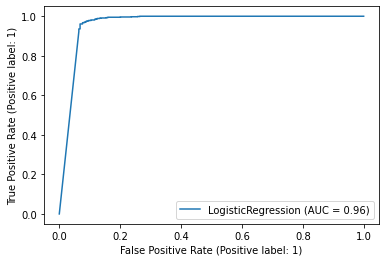

In [6]:
lr = LogisticRegression()
lr.fit(traindata, traintarget)
pred = lr.predict(testdata)
print("Logistic Regression results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(lr,testdata,testtarget)

# Gaussian Naive Bayes

Gaussian NB results: 
Accuracy score:  0.8342911877394636
Confusion matrix: 
[[216  33]
 [140 655]]
ROC curve: 


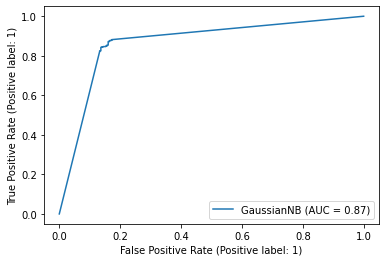

In [7]:
gnb = GaussianNB()
gnb.fit(traindata, traintarget)
pred = gnb.predict(testdata)
print("Gaussian NB results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(gnb,testdata,testtarget)

# K-Neighbours Classifier


K-neighbours results: 
Accuracy score:  0.9367816091954023
Confusion matrix: 
[[191  58]
 [  8 787]]
ROC curve: 


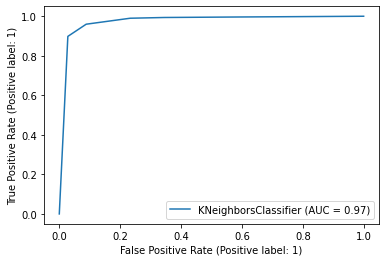

In [8]:
knn = KNeighborsClassifier()
knn.fit(traindata, traintarget)
pred = knn.predict(testdata)
print("K-neighbours results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(knn,testdata,testtarget)

# Random Forest Classifier

RandomForest results: 
Accuracy score:  0.9655172413793104
Confusion matrix: 
[[222  27]
 [  9 786]]
ROC curve: 


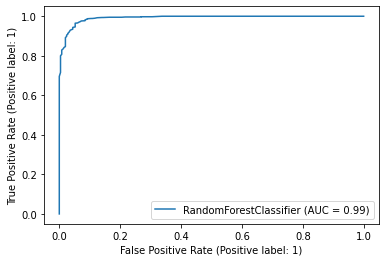

In [9]:
rfc = RandomForestClassifier()
rfc.fit(traindata, traintarget)
pred = rfc.predict(testdata)
print("RandomForest results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(rfc,testdata,testtarget)

# Inference:

* Logistic Regression accuracy: 95.6%
* Gaussian Naive Bayes accuracy: 84.2%
* KNN accuracy: 93.1%
* RandomForest accuracy: 95.9%

In terms of accuracy values and ROC curves, RandomForest and Logistic Regression performed well. Although KNN performs almost as well as the others, Gaussian Naive Bayes has performed less comparitively.

Preprocessing for performance enhancement:

Noise reduction was used in this case to see if it had an effect on the model's overall performance. For this, a Gaussian filter with sigma=0.9 will be employed (sigma=0.9 since prior studies with the same dataset shown that this parameter value produced the best results). A sample is shown below:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """


Text(0.5, 1.0, 'image + gaussian filter')

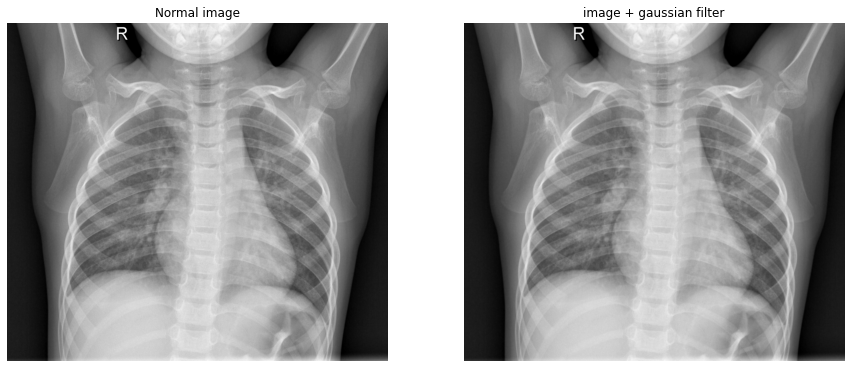

In [10]:
import matplotlib.pyplot as plt
from skimage.filters import gaussian

img = cv2.imread("/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
imggsn = gaussian(img,sigma=0.9)


fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Normal image')

fig.add_subplot(1,2,2)
plt.imshow(imggsn,cmap='gray')
plt.axis('off')
plt.title('image + gaussian filter')


We can see very minimal changes above.

In [11]:
classpaths = ['/content/drive/MyDrive/chest_xray/train/NORMAL','/content/drive/MyDrive/chest_xray/train/PNEUMONIA']
data = []
target = []
d = {'NORMAL':0,'PNEUMONIA':1}

for classpath in classpaths:
  c = classpath.split('/')[-1]
  print("Loading "+c)
  imgnames = os.listdir(classpath)
  for imgname in imgnames:
    imgpath = os.path.join(classpath,imgname)
    img = cv2.imread(imgpath)
    img = cv2.resize(img,(100,100))
    imggsn = gaussian(img,sigma=0.9)
    img = np.array(imggsn)
    data.append(img)
    target.append(d[c])
  print(c+" done")

data2 = [0 for i in range(len(data))]
for i,d in enumerate(data):
  data2[i] = np.ravel(d)
data = np.array(data2)
target = np.array(target)

traindata, testdata, traintarget, testtarget = train_test_split(data,target,test_size=0.2)


print(traindata.shape)
print(traintarget.shape)
print(testdata.shape)
print(testtarget.shape)

Loading NORMAL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


NORMAL done
Loading PNEUMONIA
PNEUMONIA done
(4172, 30000)
(4172,)
(1044, 30000)
(1044,)


# Logistic Regression

Logistic Regression results: 
Accuracy score:  0.9616858237547893
Confusion matrix: 
[[231  31]
 [  9 773]]
ROC curve: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


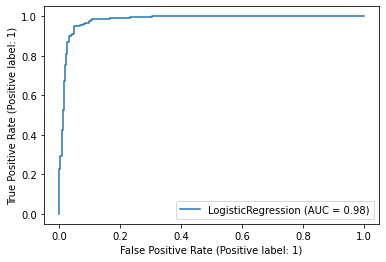

In [12]:
lr = LogisticRegression()
lr.fit(traindata, traintarget)
pred = lr.predict(testdata)
print("Logistic Regression results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(lr,testdata,testtarget)

# Gaussian Naive Bayes

Gaussian NB results: 
Accuracy score:  0.8295019157088123
Confusion matrix: 
[[212  50]
 [128 654]]
ROC curve: 


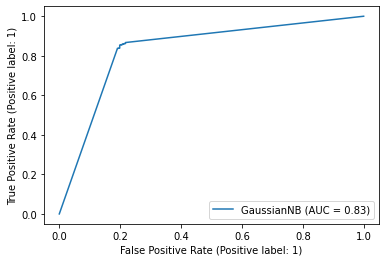

In [13]:
gnb = GaussianNB()
gnb.fit(traindata, traintarget)
pred = gnb.predict(testdata)
print("Gaussian NB results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(gnb,testdata,testtarget)

# K-Nearest Neighbours Classifier

K-nearest neighbours results: 
Accuracy score:  0.9396551724137931
Confusion matrix: 
[[222  40]
 [ 23 759]]
ROC curve: 


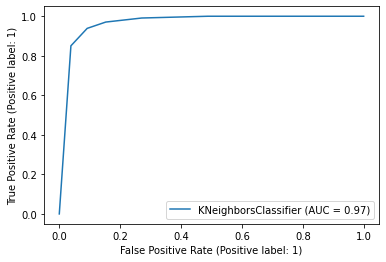

In [14]:
knn = KNeighborsClassifier()
knn.fit(traindata, traintarget)
pred = knn.predict(testdata)
print("K-nearest neighbours results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(knn,testdata,testtarget)

# Random Forest Classifier

Random Forest results: 
Accuracy score:  0.9588122605363985
Confusion matrix: 
[[228  34]
 [  9 773]]
ROC curve: 


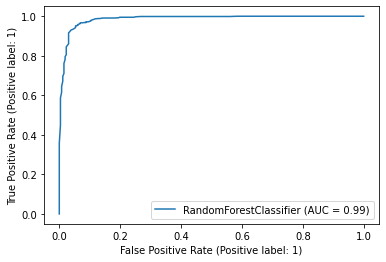

In [15]:
rfc = RandomForestClassifier()
rfc.fit(traindata, traintarget)
pred = rfc.predict(testdata)
print("Random Forest results: ")
print("Accuracy score: ",accuracy_score(testtarget,pred))
print("Confusion matrix: ")
print(confusion_matrix(testtarget,pred))
print("ROC curve: ")
RocCurveDisplay.from_estimator(rfc,testdata,testtarget)

# Inference:

*   Logistic Regression accuracy: 96.3%
*   Gaussian NaiveBayes accuracy: 85.6%
*   KNN accuracy: 94.7%
*   Random Forest accuracy: 96.3%

Out of these four models, Logistic and RandomForest have given the best results, followed by KNN and then Gaussian Naive Bayes classifier.

# Conclusion:

When we compare the first case (without preprocessing) to the second case (with preprocessing), we can find a considerable increase in the accuracy of logistic regression and randomforest classifiers. The accuracy of the other two models has similarly decreased. As a result, it can be inferred that the preprocessing strategy used here improved the accuracy of certain models while decreasing the accuracy of others for the provided dataset. We can observe the ROC curve, as well as the confusion matrices, exhibiting variations in a similar pattern as the accuracy values. Furthermore, when compared to models like KNN, RandomForest and Logistic Regression are more commonly utilised.
